# Credit Card Fraud Detection

Aim : The aim of this project is to develop a machine learning model capable of accurately detecting fraudulent credit card                                                                                                                             transactions, thereby reducing financial losses and enhancing security for users.                                            
Name : Abhay Pawar                                                                                                             
Domain : Data Science

## About the Project

This project focuses on developing a machine learning model to detect fraudulent credit card transactions. By analyzing a dataset of credit card transactions, the model aims to identify patterns indicative of fraud, thereby helping to prevent financial losses and enhance security. The project involves data preprocessing, feature engineering, model training, and evaluation to create an effective and reliable fraud detection system.

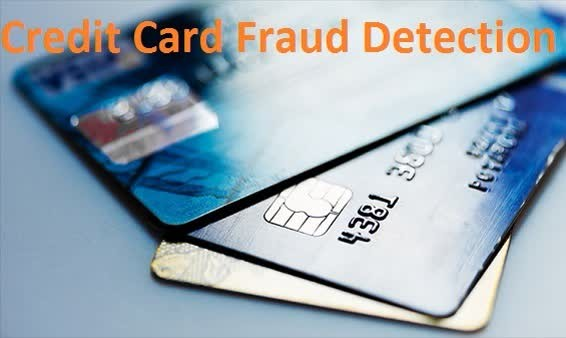

## Import Modules

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data OverView

In [6]:
df=pd.read_csv(r'C:\Users\ABHAY\Desktop\DataSc\Internship\Abhay_Pawar\creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
# finding the dimensions
df.shape

(284807, 31)

In [11]:
# Name of the columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
df['Time'].value_counts()

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: count, Length: 124592, dtype: int64

Number of seconds elapsed between this transaction and the first transaction in the dataset.

In [13]:
df['Amount'].value_counts()

Amount
1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
62.09          1
552.05         1
1467.75        1
196.68         1
95.63          1
Name: count, Length: 32767, dtype: int64

Transaction amount is given in US dollars.

In [14]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

1 for fraudulent transactions, 0 otherwise.

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Data Cleaning

In [17]:
# gives total unique values present in all the columns
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [20]:
# Matrix indicating where each entry [i][j] is True if the value is null and False otherwise.
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# gives total count of null values in a particular column
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Since all the columns do not contain NULL values so we dont need any replacement.

In [23]:
# Describes the statistics of our Dataset 
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [24]:
# Describes schema of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Data PreProcessing

In [25]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This dataset is highly unbalanced.                                                                                            
0 --> Normal Transaction                                                                                                        
1 --> Fraudulent Transaction

In [26]:
# separating the data for analysis
legit=df[df['Class']==0]
fraud=df[df['Class']==1]

In [27]:
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [28]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [30]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [31]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [33]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent transactions.                 

Number of Fraudulent Transactions --> 492

In [35]:
legit_sample=legit.sample(n=492)
legit_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
164242,116570.0,-0.428485,-0.157038,0.903260,-2.321697,-0.474959,0.927811,-1.513421,-2.354461,-1.137749,...,-1.366064,-0.334943,-0.271813,0.035183,1.361776,-0.368890,-0.050456,0.159726,76.00,0
49886,44251.0,-1.706406,-0.895793,2.677880,1.694079,-0.100273,0.544179,-0.632774,0.634156,0.512406,...,0.111251,0.151353,0.195523,-0.005906,0.429962,-0.114830,0.302497,0.172932,150.00,0
169680,119806.0,-0.995622,-0.716989,1.292262,-0.035708,-0.208194,0.387326,0.514654,0.148168,-1.618422,...,-0.140457,-0.421434,0.234185,-0.560870,0.781467,-0.457717,-0.075099,-0.031917,223.00,0
175836,122511.0,-0.559819,-0.304159,0.688488,-2.834676,0.914140,-0.207371,0.791618,-0.244891,-1.193160,...,-0.196705,0.068019,-0.347595,0.445512,0.319690,1.226222,-0.210368,-0.137193,32.26,0
240279,150528.0,-2.221534,1.513242,-1.612961,0.045677,1.747268,4.670400,-1.984694,-0.875276,-0.294000,...,-1.377078,-0.290616,0.625119,0.611402,-1.131100,-1.078966,-0.782421,0.219691,15.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118883,75246.0,0.873155,-0.182592,0.234478,1.315253,-0.289382,-0.372305,0.314497,-0.092484,-0.062172,...,-0.051151,-0.481392,-0.063786,0.054232,0.329997,-0.523840,0.002523,0.051032,166.98,0
185088,126511.0,1.729959,-0.788174,-0.220770,0.429090,-0.708431,0.139907,-0.657436,0.058318,1.387296,...,0.149306,0.365019,0.174766,0.625583,-0.376554,-0.454284,0.039425,0.003358,132.22,0
268086,163051.0,1.816570,-1.965249,-3.116121,-1.637216,-0.039542,-0.681284,0.348407,-0.548925,-2.403461,...,0.311420,0.689835,-0.480261,0.171607,0.620167,0.253566,-0.136756,-0.042938,324.75,0
168541,119274.0,2.044393,0.065257,-1.818882,0.226003,0.622168,-0.305304,0.037756,-0.024171,0.306735,...,-0.331097,-0.893421,0.300585,0.116657,-0.274467,0.179395,-0.066038,-0.045029,1.79,0


In [36]:
# concatenating 2 dataframes
new_dataset=pd.concat([legit_sample,fraud],axis=0)
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
164242,116570.0,-0.428485,-0.157038,0.903260,-2.321697,-0.474959,0.927811,-1.513421,-2.354461,-1.137749,...,-1.366064,-0.334943,-0.271813,0.035183,1.361776,-0.368890,-0.050456,0.159726,76.00,0
49886,44251.0,-1.706406,-0.895793,2.677880,1.694079,-0.100273,0.544179,-0.632774,0.634156,0.512406,...,0.111251,0.151353,0.195523,-0.005906,0.429962,-0.114830,0.302497,0.172932,150.00,0
169680,119806.0,-0.995622,-0.716989,1.292262,-0.035708,-0.208194,0.387326,0.514654,0.148168,-1.618422,...,-0.140457,-0.421434,0.234185,-0.560870,0.781467,-0.457717,-0.075099,-0.031917,223.00,0
175836,122511.0,-0.559819,-0.304159,0.688488,-2.834676,0.914140,-0.207371,0.791618,-0.244891,-1.193160,...,-0.196705,0.068019,-0.347595,0.445512,0.319690,1.226222,-0.210368,-0.137193,32.26,0
240279,150528.0,-2.221534,1.513242,-1.612961,0.045677,1.747268,4.670400,-1.984694,-0.875276,-0.294000,...,-1.377078,-0.290616,0.625119,0.611402,-1.131100,-1.078966,-0.782421,0.219691,15.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [37]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [38]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94994.569106,0.188308,-0.098476,0.006161,-0.093257,-0.073415,0.028557,0.051163,-0.007222,-0.015817,...,0.024021,-0.010331,0.024923,0.023554,0.020401,-0.021036,-0.011811,0.002604,0.003526,101.317500
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


As the mean value is coming almost similar which means that nature of the dataset has not changed.

In [39]:
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
164242,116570.0,-0.428485,-0.157038,0.903260,-2.321697,-0.474959,0.927811,-1.513421,-2.354461,-1.137749,...,-1.366064,-0.334943,-0.271813,0.035183,1.361776,-0.368890,-0.050456,0.159726,76.00,0
49886,44251.0,-1.706406,-0.895793,2.677880,1.694079,-0.100273,0.544179,-0.632774,0.634156,0.512406,...,0.111251,0.151353,0.195523,-0.005906,0.429962,-0.114830,0.302497,0.172932,150.00,0
169680,119806.0,-0.995622,-0.716989,1.292262,-0.035708,-0.208194,0.387326,0.514654,0.148168,-1.618422,...,-0.140457,-0.421434,0.234185,-0.560870,0.781467,-0.457717,-0.075099,-0.031917,223.00,0
175836,122511.0,-0.559819,-0.304159,0.688488,-2.834676,0.914140,-0.207371,0.791618,-0.244891,-1.193160,...,-0.196705,0.068019,-0.347595,0.445512,0.319690,1.226222,-0.210368,-0.137193,32.26,0
240279,150528.0,-2.221534,1.513242,-1.612961,0.045677,1.747268,4.670400,-1.984694,-0.875276,-0.294000,...,-1.377078,-0.290616,0.625119,0.611402,-1.131100,-1.078966,-0.782421,0.219691,15.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


## Fraud Detection

In [42]:
# Select Independent and Target variables
X=new_dataset.drop(columns=['Class'])
Y=new_dataset['Class']

In [43]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
164242,116570.0,-0.428485,-0.157038,0.903260,-2.321697,-0.474959,0.927811,-1.513421,-2.354461,-1.137749,...,0.819412,-1.366064,-0.334943,-0.271813,0.035183,1.361776,-0.368890,-0.050456,0.159726,76.00
49886,44251.0,-1.706406,-0.895793,2.677880,1.694079,-0.100273,0.544179,-0.632774,0.634156,0.512406,...,0.761557,0.111251,0.151353,0.195523,-0.005906,0.429962,-0.114830,0.302497,0.172932,150.00
169680,119806.0,-0.995622,-0.716989,1.292262,-0.035708,-0.208194,0.387326,0.514654,0.148168,-1.618422,...,0.144682,-0.140457,-0.421434,0.234185,-0.560870,0.781467,-0.457717,-0.075099,-0.031917,223.00
175836,122511.0,-0.559819,-0.304159,0.688488,-2.834676,0.914140,-0.207371,0.791618,-0.244891,-1.193160,...,-0.345738,-0.196705,0.068019,-0.347595,0.445512,0.319690,1.226222,-0.210368,-0.137193,32.26
240279,150528.0,-2.221534,1.513242,-1.612961,0.045677,1.747268,4.670400,-1.984694,-0.875276,-0.294000,...,0.171992,-1.377078,-0.290616,0.625119,0.611402,-1.131100,-1.078966,-0.782421,0.219691,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [44]:
Y

164242    0
49886     0
169680    0
175836    0
240279    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# train and test dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [47]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(787, 30) (197, 30) (787,) (197,)


### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
# Using Logistic Regression since it is multi class classification.
model_Log=LogisticRegression()
model_Log.fit(X_train,Y_train)

LogisticRegression()

In [51]:
print("Training Score : ",model_Log.score(X_train,Y_train))
print("Test Score : ",model_Log.score(X_test,Y_test))

Training Score :  0.9479034307496823
Test Score :  0.9746192893401016


In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
y_predicted=model_Log.predict(X_test)
cm=confusion_matrix(Y_test,y_predicted)
cm

array([[93,  2],
       [ 3, 99]], dtype=int64)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        95
           1       0.98      0.97      0.98       102

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197



### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
model_RF=RandomForestClassifier(n_estimators=30)
model_RF.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=30)

In [57]:
print("Training Score : ",model_RF.score(X_train,Y_train))
print("Test Score : ",model_RF.score(X_test,Y_test))

Training Score :  0.9974587039390089
Test Score :  0.9593908629441624


In [58]:
y_predicted=model_RF.predict(X_test)
cm=confusion_matrix(Y_test,y_predicted)
cm

array([[94,  1],
       [ 7, 95]], dtype=int64)

In [59]:
print(classification_report(Y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        95
           1       0.99      0.93      0.96       102

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197

